In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [31]:
base_path = r"C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\"
filenames = ["12-05_11-37_CentralizedRNN_Flat", "12-05_12-18_CentralizedRNN_25rounds", "12-05_13-30_CentralizedRNN50_bs1_sl100", "12-05_14-09_CentralizedLSTM25_bs1_sl100", "12-05_15-22_CentralizedLinRegr25_nohypers"]
label_names = ["Cent_RNN_bs32_sl1000_lr0p001", "Cent_RNN_bs32_sl1000_lr0p01", "Cent_RNN_bs1_sl100_lr0p1", "Cent_LSTM_bs1_sl100_lr0p1", "Cent_LinRegr_lr0p1"]
# This one was only 5 roudns so I removed it: "12-05_12-27_CentralizedLSTM5"
h5filename = r"\\Centralized_test.h5"
full_filepaths_lst = [base_path+f+h5filename for f in filenames]

for f in full_filepaths_lst:
    print(f)


C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\12-05_11-37_CentralizedRNN_Flat\\Centralized_test.h5
C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\12-05_12-18_CentralizedRNN_25rounds\\Centralized_test.h5
C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\12-05_13-30_CentralizedRNN50_bs1_sl100\\Centralized_test.h5
C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\12-05_14-09_CentralizedLSTM25_bs1_sl100\\Centralized_test.h5
C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\Deep576\\12-05_15-22_CentralizedLinRegr25_nohypers\\Centralized_test.h5


In [32]:
train_losses_log = [0]*len(filenames)
test_losses_log = [0]*len(filenames)

for file_idx, file in enumerate(full_filepaths_lst):
    with h5py.File(file, 'r') as f:
        a_group_key = list(f.keys())
        if file_idx==0:
            print(a_group_key)
        train_losses_log[file_idx] = f['rs_train_loss'][()]
        test_losses_log[file_idx]  = f['rs_test_loss'][()]

print("Complete")

['client_testing_logs', 'cost_func_tuples_by_client', 'gradient_norm_lists_by_client', 'rs_test_loss', 'rs_train_loss']
Complete


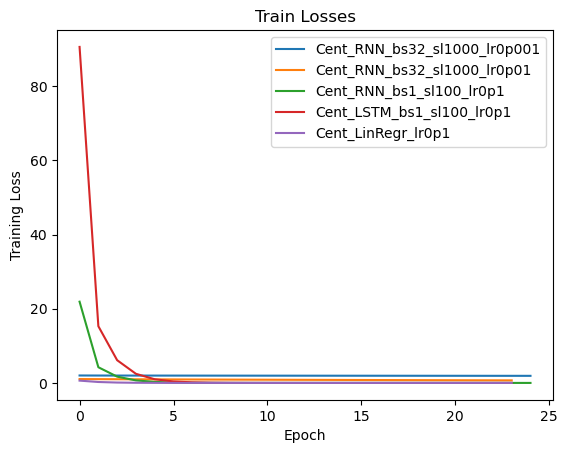

In [33]:
for cli_loss_idx in range(len(train_losses_log)):
    plt.plot(range(len(train_losses_log[cli_loss_idx][:25])), train_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])
plt.title("Train Losses")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

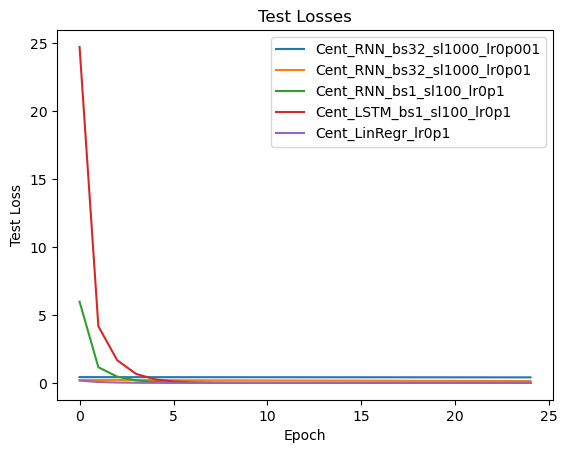

In [34]:
for cli_loss_idx in range(len(test_losses_log)):
    plt.plot(range(25), test_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])
plt.title("Test Losses")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

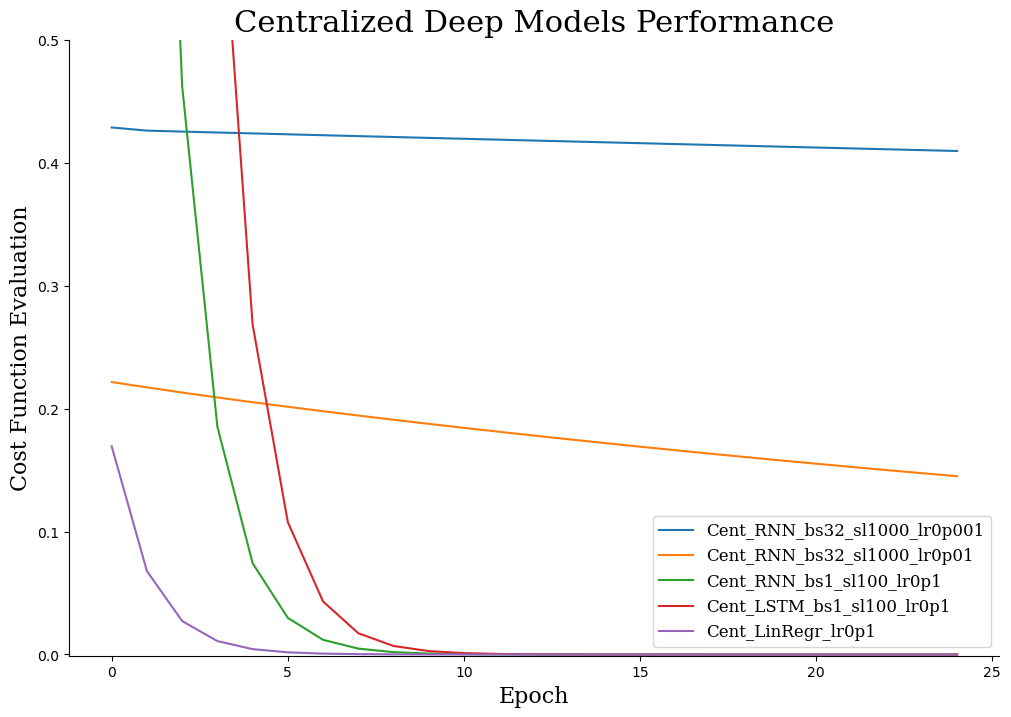

In [57]:
my_title = 'Decoding Model Testing Error'
legend_on = True
axes_off_list = []
input_linewidth = 3
my_legend_loc = 'best'

axes_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16}
title_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 22}

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize based on your poster size

# Define colors for plotting
colors = {'GLOBAL': 'orange', 'LOCAL': 'darkorchid', 'PERS': 'blue'}

for cli_loss_idx in range(len(test_losses_log)):
    #plt.plot(range(25), test_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])
    #ax.plot(scaled_step_indices[:-2], test_cost_df_FLSim_PCA10.iloc[-1, :-2], linewidth=input_linewidth, label="Averaged Local Models", color='blue')
    ax.plot(range(25), test_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])

ax.set_ylabel('Cost Function Evaluation', fontdict=axes_font)  # Adjust font size
ax.set_xlabel('Epoch', fontdict=axes_font)  # Adjust font size
ax.set_title('Centralized Deep Models Performance', fontdict=title_font)

#ax.set_title(my_title, fontsize=36)  # Adjust font size
ax.set_ylim(-0.001, 0.5)
#ax.set_xlim(0, 600)

#xtick_positions = np.arange(0, 601, 100)
#xtick_labels = [str(pos) for pos in xtick_positions]  # Convert positions to strings
tick_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
#plt.xticks(xtick_positions, xtick_labels, fontdict=tick_font)
#ax1.set_xticklabels(xtick_labels, fontdict=tick_font)

#ytick_positions = np.arange(0.002, 0.014, 0.002)
#ytick_labels = [str(pos) for pos in ytick_positions]  # Convert positions to strings
#plt.yticks(ytick_positions, ytick_labels, fontdict=tick_font)

legend_font = {'family': 'serif', 'size': 12}
ax.legend(loc='best', prop=legend_font)#, bbox_to_anchor=(0.2, 0.4))  # Adjust legend font size
ax.spines[['right', 'top']].set_visible(False)

plt.show()

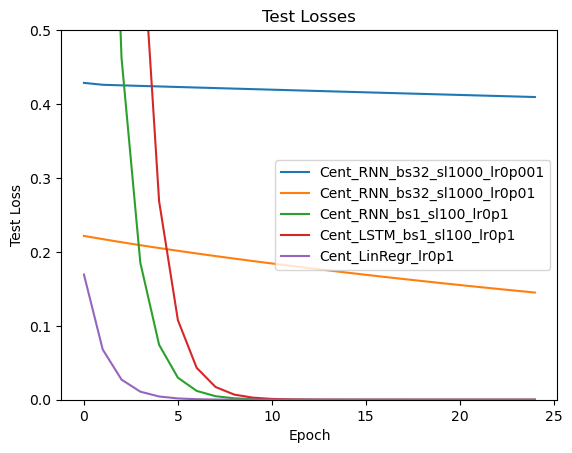

In [35]:
for cli_loss_idx in range(len(test_losses_log)):
    plt.plot(range(25), test_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])
plt.title("Test Losses")
plt.ylim(0, 0.5)
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

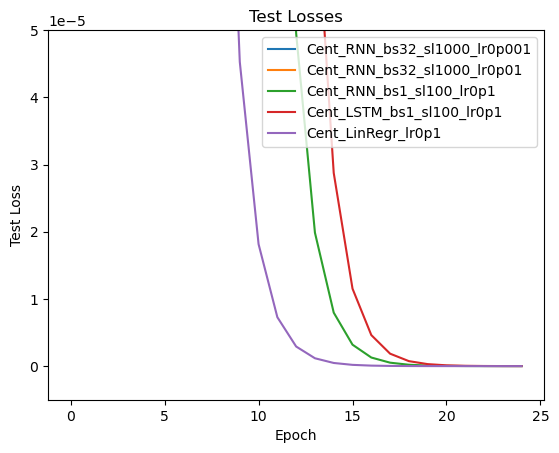

In [49]:
for cli_loss_idx in range(len(test_losses_log)):
    plt.plot(range(25), test_losses_log[cli_loss_idx][:25], label=label_names[cli_loss_idx])
plt.title("Test Losses")
plt.ylim(-0.000005, 0.00005)
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()